# Visualization of Alaska tests and stBenchmark

- 1 in hinblick auf: welcher automatische algorithmus wird gewählt
		- ist das der beste?
		- graph: different matching algorithms mapping optimality/minimality, automatisch gewählten highlighten irgendwie
- 2 was ist ein guter default wert für threshold? nur für coma opt, da für jl col names only nicht der threshold wichtig ist, sondern der cutoff 
		- graph: different thresholds für coma opt und schema mapping optimality/minimality
		- graph: different jl col names only und schema mapping optimality/minimality
- 3 in hinblick auf: welche fitness funktion bei dynamap
		- nur zwei oder so matchers (was sind die besten? am ehesten sollten wir jl col names only & coma opt nehmen), aber dafür 2/3 fitness funktionen
		- original, mine, und wenn zeit ist: die aus dem paper, was ich noch gefunden hatte
- 4 in hinblick auf: bei dynamap left join oder immer nur union bei rechter seite von dem merge decision graphen?
		- nur zwei oder so matchers (jl col names only & coma opt?), einmal mit left join und einmal mit nur unions
- 5 (was ändert sich zwischen 2er kombis und 3er kombis? (nur wenige matchers hier, wegen zeit))
- 6 stBenchMark

In [22]:
import pickle
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [23]:
# collate infos
output_folder_name = "intermediate_results/monitor_2_sampled_matching_algos/"
infos = []
pkls = [f for f in os.listdir(output_folder_name) if f.endswith('.pkl')]
for p in pkls:
    with open(output_folder_name + p, 'rb') as intermediate_pkl:
        info = pickle.load(intermediate_pkl)
        infos.append(info)
df_infos = pd.DataFrame(infos)

In [59]:
# or open from pre-collated file
with open("intermediate_monitor_2_sampled_tiny_files_output.pkl", 'rb') as fr:
    infos = pickle.load(fr)
df_infos = pd.DataFrame(infos)

In [24]:
df_infos.head()

,domain,all_compared_files,num_compared_files,threshold,jl_cutoff,algorithm,automatically_set_algorithm,matches_precision,matches_recall,matches_f1_score,matches_recall_at_sizeof_ground_truth,matches_time,best_mapping_dynamap_name,best_mapping_dynamap_merge_types,best_mapping_dynamap_fitness_score,mapping_time,size_intersection_target_schema_alaska_target_schema_dynamap,size_extra_columns_target_schema_alaska_target_schema_dynamap,size_extra_columns_target_schema_alaska_best_mapping_dynamap,size_missing_columns_target_schema_alaska_target_schema_dynamap,size_missing_columns_target_schema_alaska_best_mapping_dynamap,mapping_operations_count,mapping_precision,mapping_precision_real,mapping_recall,mapping_recall_real,mapping_f1_score,mapping_f1_score_real,mapping_completeness,mapping_completeness_real,mapping_minimality,mapping_minimality_real,matches,matches_above_thresh,target_schema_alaska,target_schema_dynamap,target_schema_dynamap_translated_to_alaska,best_mapping_path_dynamap,best_mapping_dynamap_columns,best_mapping_dynamap_columns_translated_to_alaska,intersection_target_schema_alaska_target_schema_dynamap,intersection_target_schema_alaska_best_mapping_dynamap,extra_columns_target_schema_alaska_target_schema_dynamap,extra_columns_target_schema_alaska_best_mapping_dynamap,missing_columns_target_schema_alaska_target_schema_dynamap,missing_columns_target_schema_alaska_best_mapping_dynamap,error
0,monitor,"[ca.pcpartpicker.com, www.cleverboxes.com]",2,0,0.6,JaccardLevenMatcherColNamesOnly,False,0.250000,0.588235,0.350877,0.588235,0.196152,ca.pcpartpicker.com_www.cleverboxes.com,"{'union': 36, 'left join': 1}",3.0,1.169185,28.0,7.0,102.0,38.0,19.0,37.0,0.562500,0.215385,0.191489,0.595745,0.285714,0.316384,0.191489,0.595745,0.562500,0.281690,"{(('ca.pcpartpicker.com', '<page title>'), ('w...","{(('ca.pcpartpicker.com', '<page title>'), ('w...","[has_speakers, has_dvi_port, has_hdmi_port, ha...","[<page title>, aspect ratio, speakers, hd supp...","[<page title>, supported_aspect_ratio, speaker...","[union, ca.pcpartpicker.com, www.cleverboxes.c...","[<page title>, aspect ratio, speakers, contras...","[<page title>, supported_aspect_ratio, speaker...","{dvi_port_quantity, supported_resolution, resp...","{supported_resolution, vertical_refresh_rate_r...","{screen mode, hd support, svideo, view angle, ...","{antiglare antistatic, number of screens, syn...","{headphone_port_type, working_temperature_max,...","{headphone_port_type, working_temperature_max,...",NaN
1,monitor,"[ca.pcpartpicker.com, www.cleverboxes.com]",2,0,0.6,JaccardLevenMatcher,False,0.052885,0.687500,0.098214,0.687500,17.334553,ca.pcpartpicker.com_www.cleverboxes.com,"{'union': 41, 'left join': 1}",3.0,1.158230,28.0,2.0,105.0,47.0,19.0,42.0,0.000000,0.210526,0.000000,0.595745,0.000000,0.311111,0.000000,0.595745,0.000000,0.285714,"{(('ca.pcpartpicker.com', 'component'), ('www....","{(('ca.pcpartpicker.com', 'component'), ('www....","[has_speakers, has_dvi_port, has_hdmi_port, ha...","[led, brand name]","[led, brand name]","[union, ca.pcpartpicker.com, www.cleverboxes.c...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...",{},"{supported_resolution, vertical_refresh_rate_r...","{brand name, led}","{antiglare antistatic, number of screens, syn...","{headphone_port_type, supported_resolution, wo...","{headphone_port_type, working_temperature_max,...",NaN
2,monitor,"[ca.pcpartpicker.com, www.cleverboxes.com]",2,0,0.7,JaccardLevenMatcherColNamesOnly,False,0.285714,0.352941,0.315789,0.352941,0.163589,ca.pcpartpicker.com_www.cleverboxes.com,"{'union': 37, 'left join': 1}",3.0,1.235218,28.0,5.0,104.0,38.0,19.0,38.0,0.642857,0.212121,0.191489,0.595745,0.295082,0.312849,0.191489,0.595745,0.642857,0.282759,"{(('ca.pcpartpicker.com', '<page title>'), ('w...","{(('ca.pcpartpicker.com', '<page title>'), ('w...","[has_speakers, has_dvi_port, has_hdmi_port, ha...","[<page title>, aspect ratio, builtin devices, ...","[<page title

# Ist der automatisch gewählte Matching Algorithmus der beste?
## Schema matching metrics for each matcher, schema mapping metrics for each matcher

In [25]:
df_infos = df_infos[df_infos["jl_cutoff"] == 0.8]

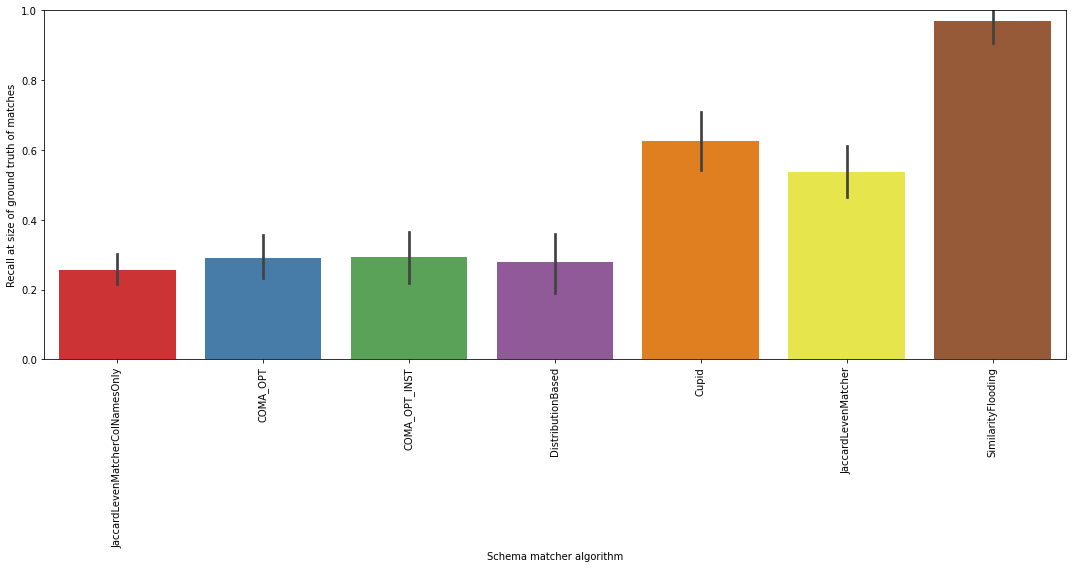

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="matches_recall_at_sizeof_ground_truth", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Recall at size of ground truth of matches")
plt.tight_layout()
plt.savefig("viz/alaska_matcher_recall_at_sizeof_ground_truth.png", dpi=400)

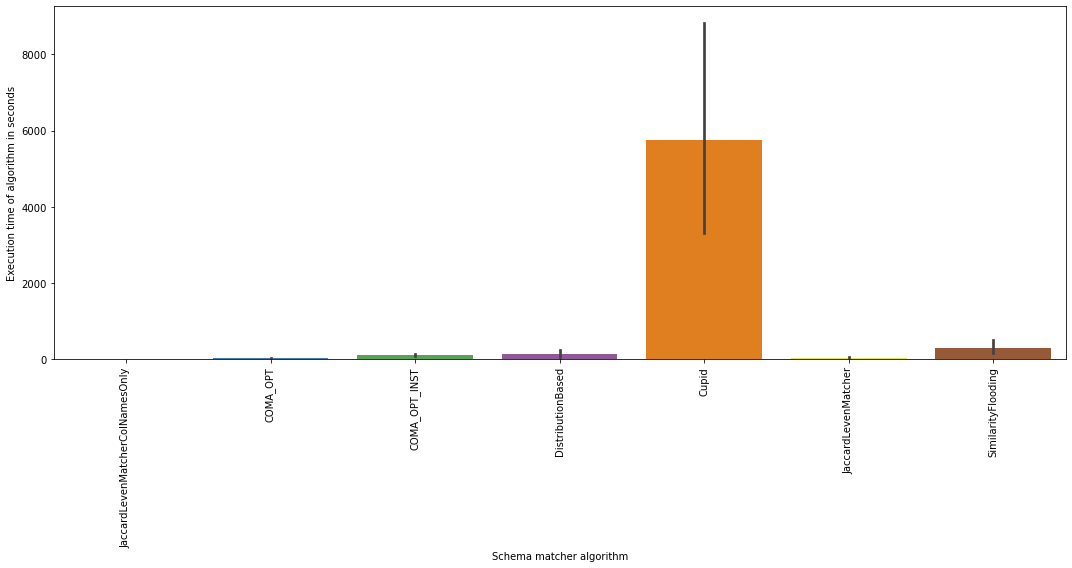

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="matches_time", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Execution time of algorithm in seconds")
plt.tight_layout()
plt.savefig("viz/alaska_matcher_running_time.png", dpi=400)

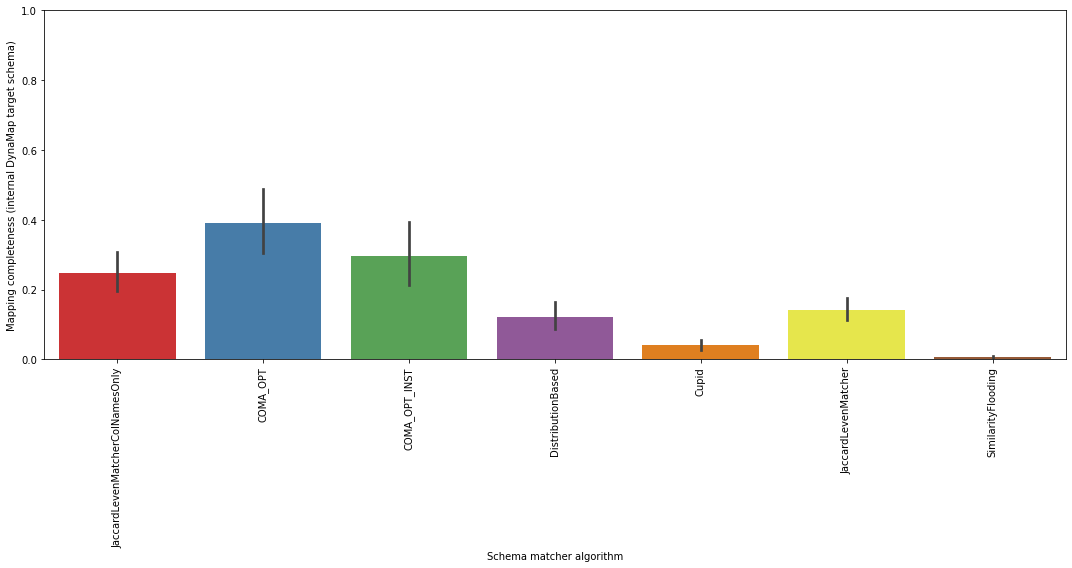

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="mapping_completeness", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Mapping completeness (internal DynaMap target schema)")
plt.tight_layout()
plt.savefig("viz/alaska_mapper_completeness.png", dpi=400)

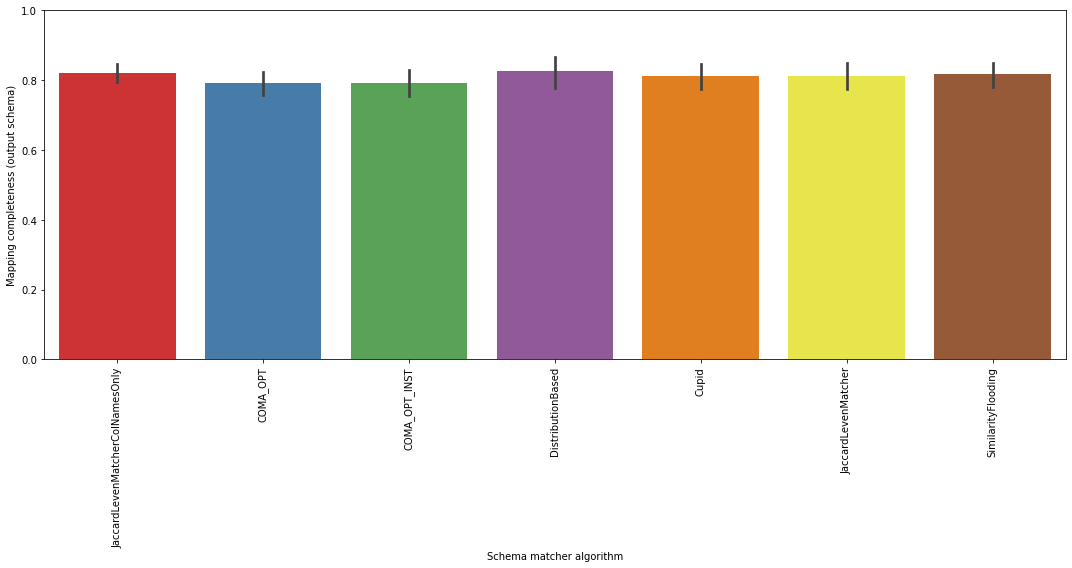

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="mapping_completeness_real", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Mapping completeness (output schema)")
plt.tight_layout()
plt.savefig("viz/alaska_mapper_completeness_real.png", dpi=400)

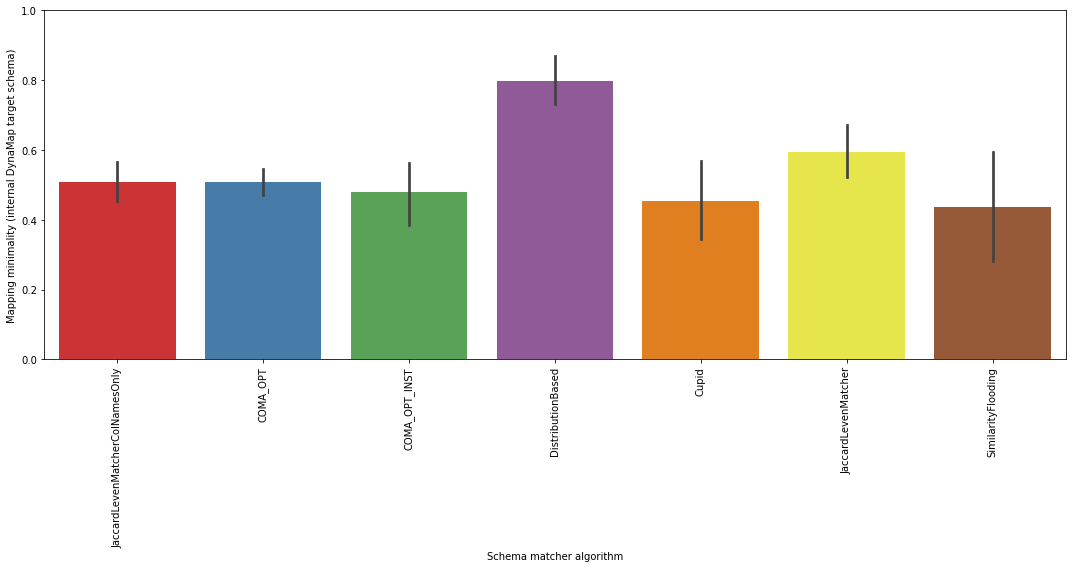

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="mapping_minimality", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Mapping minimality (internal DynaMap target schema)")
plt.tight_layout()
plt.savefig("viz/alaska_mapper_minimality.png", dpi=400)

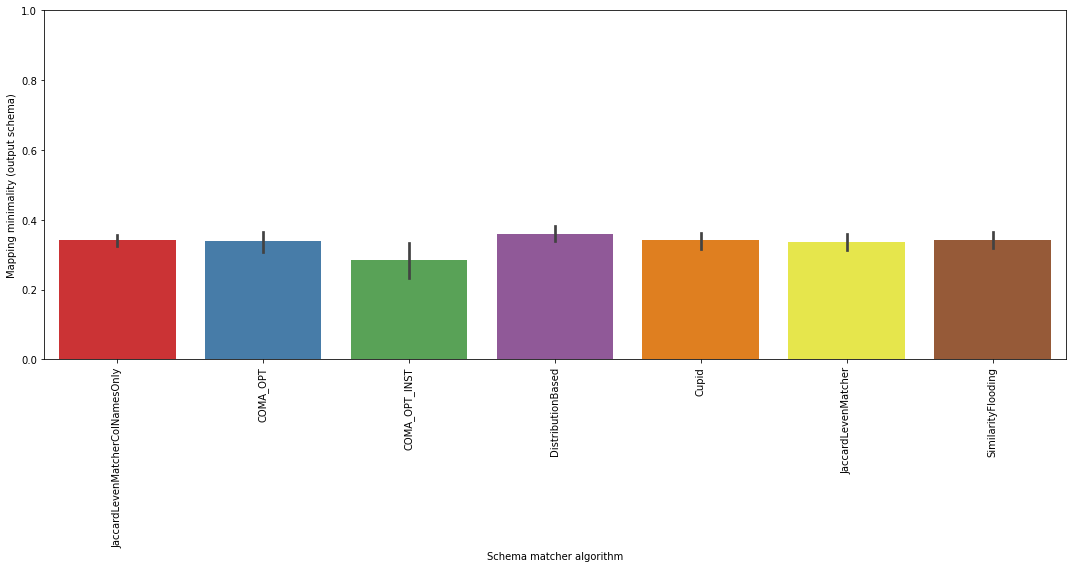

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="mapping_minimality_real", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Mapping minimality (output schema)")
plt.tight_layout()
plt.savefig("viz/alaska_mapper_minimality_real.png", dpi=400)

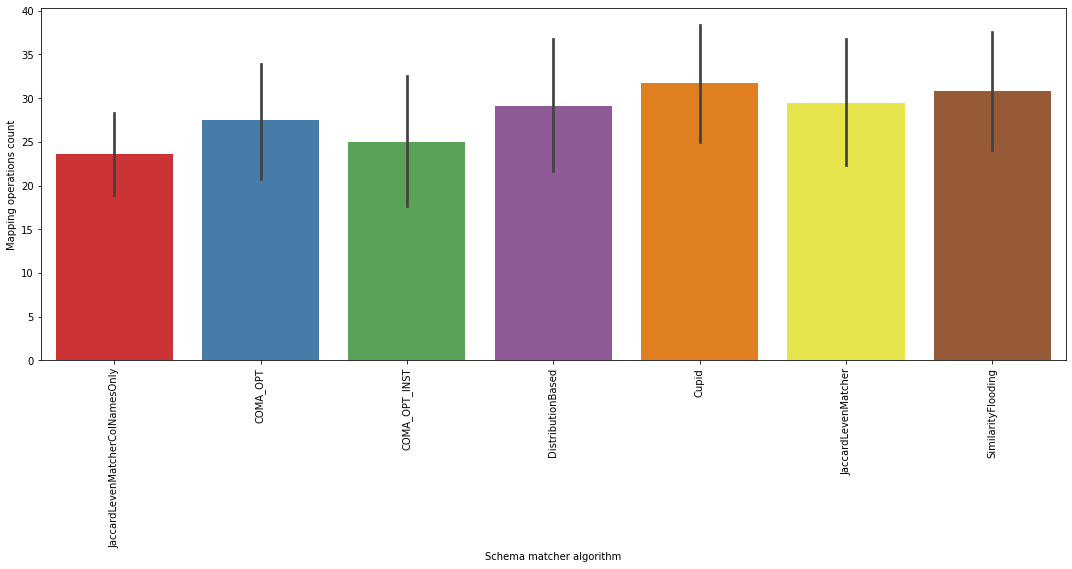

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_infos, 
            x="algorithm", 
            y="mapping_operations_count", 
            palette="Set1",
            order=["JaccardLevenMatcherColNamesOnly", "COMA_OPT", "COMA_OPT_INST", "DistributionBased", "Cupid", "JaccardLevenMatcher", "SimilarityFlooding"])
plt.xticks(rotation=90)
plt.xlabel("Schema matcher algorithm")
plt.ylabel("Mapping operations count")
plt.tight_layout()
plt.savefig("viz/alaska_mapper_operations_count.png", dpi=400)

# Guter Default-Wert für Threshold (COMA-OPT) & JL Cutoff

In [97]:
algorithm_names = ["COMA_OPT"]
thresholds = [0, 0.5, 0.8]
jl_cutoffs = [0]
auto_algo = [False]
coma_opt = df_infos[df_infos["algorithm"].isin(algorithm_names) & \
                        df_infos["threshold"].isin(thresholds) & \
                        df_infos["jl_cutoff"].isin(jl_cutoffs) & \
                        df_infos["automatically_set_algorithm"].isin(auto_algo)]

In [98]:
coma_opt.head()

,domain,all_compared_files,num_compared_files,threshold,jl_cutoff,algorithm,automatically_set_algorithm,matches_precision,matches_recall,matches_f1_score,matches_recall_at_sizeof_ground_truth,matches_time,best_mapping_dynamap_name,best_mapping_dynamap_merge_types,best_mapping_dynamap_fitness_score,mapping_time,size_intersection_target_schema_alaska_target_schema_dynamap,size_extra_columns_target_schema_alaska_target_schema_dynamap,size_extra_columns_target_schema_alaska_best_mapping_dynamap,size_missing_columns_target_schema_alaska_target_schema_dynamap,size_missing_columns_target_schema_alaska_best_mapping_dynamap,mapping_operations_count,mapping_precision,mapping_precision_real,mapping_recall,mapping_recall_real,mapping_f1_score,mapping_f1_score_real,mapping_completeness,mapping_completeness_real,mapping_minimality,mapping_minimality_real,matches,matches_above_thresh,target_schema_alaska,target_schema_dynamap,target_schema_dynamap_translated_to_alaska,best_mapping_path_dynamap,best_mapping_dynamap_columns,best_mapping_dynamap_columns_translated_to_alaska,intersection_target_schema_alaska_target_schema_dynamap,intersection_target_schema_alaska_best_mapping_dynamap,extra_columns_target_schema_alaska_target_schema_dynamap,extra_columns_target_schema_alaska_best_mapping_dynamap,missing_columns_target_schema_alaska_target_schema_dynamap,missing_columns_target_schema_alaska_best_mapping_dynamap,error
0,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.5,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,1.000000,3.455442,ca.pcpartpicker.com_catalog.com,{'union': 2},7.0,0.298983,16.0,3.0,16.0,13.0,2.0,2.0,0.625000,0.500,0.277778,0.888889,0.384615,0.640000,0.277778,0.888889,0.625,0.500000,"{(('ca.pcpartpicker.com', 'contrast ratio'), (...","{(('ca.pcpartpicker.com', 'contrast ratio'), (...","[has_speakers, brand, screen_type, displayport...","[contrast ratio, <page title>, aspect ratio, r...","[contrast_ratio_static, <page title>, supporte...","[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{contrast_ratio_static, supported_aspect_ratio...","{dvid_port_quantity, contrast_ratio_static, su...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
1,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.8,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,1.000000,5.510621,ca.pcpartpicker.com_catalog.com,{'union': 3},7.0,0.244269,16.0,3.0,16.0,13.0,2.0,3.0,0.625000,0.500,0.277778,0.888889,0.384615,0.640000,0.277778,0.888889,0.625,0.500000,"{(('ca.pcpartpicker.com', 'contrast ratio'), (...",{},"[has_speakers, brand, screen_type, displayport...","[contrast ratio, <page title>, aspect ratio, r...","[contrast_ratio_static, <page title>, supporte...","[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{contrast_ratio_static, supported_aspect_ratio...","{dvid_port_quantity, contrast_ratio_static, su...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
15,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.0,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,1.000000,3.646349,ca.pcpartpicker.com_catalog.com,{'union': 1},7.0,0.258657,16.0,3.0,16.0,13.0,2.0,1.0,0.625000,0.500,0.277778,0.888889,0.384615,0.640000,0.277778,0.888889,0.625,0.500000,"{(('ca.pcpartpicker.com', 'contrast ratio'), (...","{(('ca.pcpartpicker.com', 'contrast ratio'), (...","[has_speakers, brand, screen_type, displayport...","[contrast ratio, <page title>, aspect ratio, r...","[contrast_ratio_static, <page title>, supporte...","[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speake

In [102]:
pd.DataFrame(np.unique(coma_opt), columns=coma_opt.columns)

TypeError: '<' not supported between instances of 'float' and 'str'

In [69]:
coma_opt = df_infos[df_infos["algorithm"] == "COMA_OPT"]
jl_colnames_only = df_infos[df_infos["algorithm"] == "JaccardLevenMatcherColNamesOnly"]
coma_opt.head()

,domain,all_compared_files,num_compared_files,threshold,jl_cutoff,algorithm,automatically_set_algorithm,matches_precision,matches_recall,matches_f1_score,...,best_mapping_path_dynamap,best_mapping_dynamap_columns,best_mapping_dynamap_columns_translated_to_alaska,intersection_target_schema_alaska_target_schema_dynamap,intersection_target_schema_alaska_best_mapping_dynamap,extra_columns_target_schema_alaska_target_schema_dynamap,extra_columns_target_schema_alaska_best_mapping_dynamap,missing_columns_target_schema_alaska_target_schema_dynamap,missing_columns_target_schema_alaska_best_mapping_dynamap,error
0,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.5,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,...,"[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{contrast_ratio_static, supported_aspect_ratio...","{dvid_port_quantity, contrast_ratio_static, su...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
1,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.8,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,...,"[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{contrast_ratio_static, supported_aspect_ratio...","{dvid_port_quantity, contrast_ratio_static, su...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
6,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.0,0.8,COMA_OPT,False,0.500000,1.000000,0.666667,...,"[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{supported_aspect_ratio, contrast_ratio_static...","{supported_aspect_ratio, contrast_ratio_static...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
15,monitor,"[ca.pcpartpicker.com, catalog.com]",2,0.0,0.0,COMA_OPT,False,0.500000,1.000000,0.666667,...,"[union, ca.pcpartpicker.com, catalog.com, [asp...","[<page title>, aspect ratio, builtin speakers,...","[<page title>, supported_aspect_ratio, has_spe...","{contrast_ratio_static, supported_aspect_ratio...","{dvid_port_quantity, contrast_ratio_static, su...","{<page title>, ips, viewing angle}","{synchronization range horizontal, widescreen...","{dvid_port_quantity, hdmi_port_quantity, verti...","{screen_type, vertical_refresh_rate_max}",NaN
16,monitor,"[ca.pcpartpicker.com, ce.yikus.com]",2,0.5,0.0,COMA_OPT,False,0.214286,0.428571,0.285714,...,"[union, ca.pcpartpicker.com, ce.yikus.com, [ma...","[<page title>, aspectratio, builtin speakers, ...","[<page title>, supported_aspect_ratio, has_spe...","{supported_aspect_ratio, vga_port_quantity, co...","{dvid_port_quantity, contrast_ratio_static, su...","{model, ips, releasedate, <page title>, led, p...","{trait, quality, upc, ean, mpn, products, led,...","{dvid_port_quantity, contrast_ratio_static, wa...","{number_of_colors, vertical_refresh_rate_max, ...",NaN


In [71]:
jl_colnames_only.columns

Index(['domain', 'all_compared_files', 'num_compared_files', 'threshold',
       'jl_cutoff', 'algorithm', 'automatically_set_algorithm',
       'matches_precision', 'matches_recall', 'matches_f1_score',
       'matches_recall_at_sizeof_ground_truth', 'matches_time',
       'best_mapping_dynamap_name', 'best_mapping_dynamap_merge_types',
       'best_mapping_dynamap_fitness_score', 'mapping_time',
       'size_intersection_target_schema_alaska_target_schema_dynamap',
       'size_extra_columns_target_schema_alaska_target_schema_dynamap',
       'size_extra_columns_target_schema_alaska_best_mapping_dynamap',
       'size_missing_columns_target_schema_alaska_target_schema_dynamap',
       'size_missing_columns_target_schema_alaska_best_mapping_dynamap',
       'mapping_operations_count', 'mapping_precision',
       'mapping_precision_real', 'mapping_recall', 'mapping_recall_real',
       'mapping_f1_score', 'mapping_f1_score_real', 'mapping_completeness',
       'mapping_completeness_rea

In [86]:
jl_colnames_only_dedup = jl_colnames_only.drop_duplicates(subset=['domain', 'num_compared_files', 'threshold',
       'jl_cutoff', 'algorithm', 
       'matches_precision', 'matches_recall', 'matches_f1_score',
       'matches_recall_at_sizeof_ground_truth', 
       'size_intersection_target_schema_alaska_target_schema_dynamap',
       'size_extra_columns_target_schema_alaska_target_schema_dynamap',
       'size_extra_columns_target_schema_alaska_best_mapping_dynamap',
       'size_missing_columns_target_schema_alaska_target_schema_dynamap',
       'size_missing_columns_target_schema_alaska_best_mapping_dynamap',
       'mapping_precision',
       'mapping_precision_real', 'mapping_recall', 'mapping_recall_real',
       'mapping_f1_score', 'mapping_f1_score_real', 'mapping_completeness',
       'mapping_completeness_real', 'mapping_minimality',
       'mapping_minimality_real'])
jl_colnames_only_dedup["jl_cutoff"].value_counts()

0.6    317
0.7    317
0.5    314
0.4    312
0.8    307
0.9    301
Name: jl_cutoff, dtype: int64

### COMA-OPT threshold
apparently no difference whatsoever

In [24]:
coma_opt_matching = coma_opt[['threshold', 'matches_precision', 'matches_recall', 'matches_f1_score', 'matches_recall_at_sizeof_ground_truth']]
coma_opt_matching_melt = pd.melt(coma_opt_matching, id_vars="threshold")

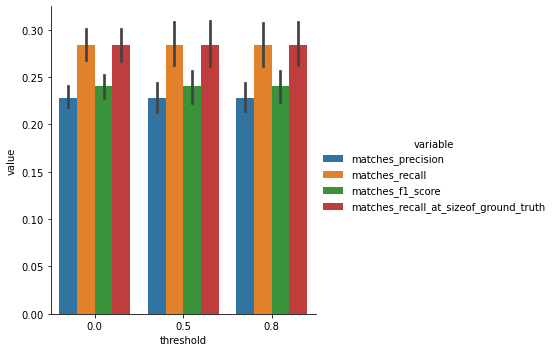

In [30]:
sns.catplot(x="threshold", y="value",
            hue="variable",
            data=coma_opt_matching_melt, kind="bar");

In [39]:
coma_opt_mapping_real = coma_opt[['threshold',
       'mapping_completeness_real',
       'mapping_minimality_real']]
coma_opt_mapping_real_melt = pd.melt(coma_opt_mapping_real, id_vars="threshold")

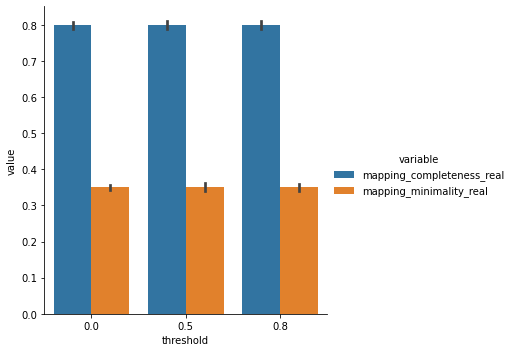

In [40]:
sns.catplot(x="threshold", y="value",
            hue="variable",
            data=coma_opt_mapping_real_melt, kind="bar");

In [41]:
coma_opt_mapping = coma_opt[['threshold',
       'mapping_completeness',
       'mapping_minimality']]
coma_opt_mapping_melt = pd.melt(coma_opt_mapping, id_vars="threshold")

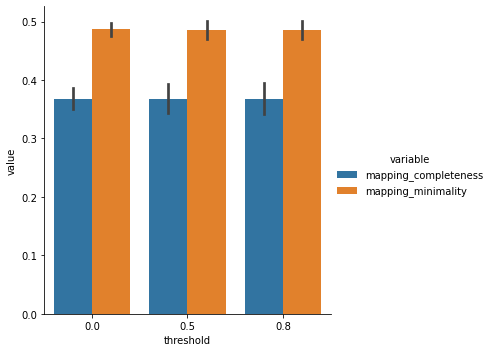

In [42]:
sns.catplot(x="threshold", y="value",
            hue="variable",
            data=coma_opt_mapping_melt, kind="bar");

### JL col names only (jl cutoff)
Matching hugely affected, (real) mapping almost not affected at all

In [87]:
jl_colnames_only_matching = jl_colnames_only_dedup[['jl_cutoff', 'matches_precision', 'matches_recall', 'matches_f1_score', 'matches_recall_at_sizeof_ground_truth']]
jl_colnames_only_matching_melt = pd.melt(jl_colnames_only_matching, id_vars="jl_cutoff")

In [88]:
jl_colnames_only_matching["jl_cutoff"].value_counts()

0.6    317
0.7    317
0.5    314
0.4    312
0.8    307
0.9    301
Name: jl_cutoff, dtype: int64

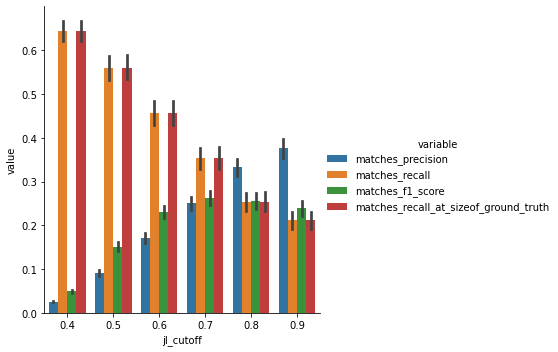

In [89]:
sns.catplot(x="jl_cutoff", y="value",
            hue="variable",
            data=jl_colnames_only_matching_melt, kind="bar");

In [90]:
jl_colnames_only_mapping_real = jl_colnames_only_dedup[['jl_cutoff',
       'mapping_completeness_real',
       'mapping_minimality_real']]
jl_colnames_only_mapping_real_melt = pd.melt(jl_colnames_only_mapping_real, id_vars="jl_cutoff")

In [91]:
jl_colnames_only_mapping_real["jl_cutoff"].value_counts()

0.6    317
0.7    317
0.5    314
0.4    312
0.8    307
0.9    301
Name: jl_cutoff, dtype: int64

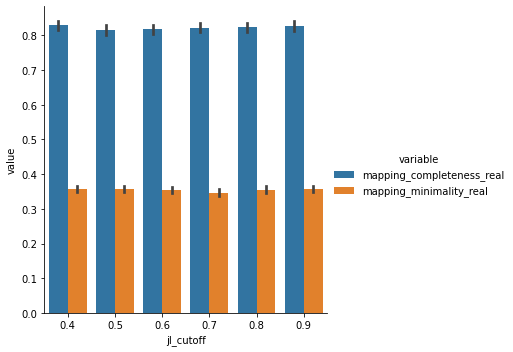

In [92]:
sns.catplot(x="jl_cutoff", y="value",
            hue="variable",
            data=jl_colnames_only_mapping_real_melt, kind="bar");

In [93]:
jl_colnames_only_mapping = jl_colnames_only_dedup[['jl_cutoff',
       'mapping_completeness',
       'mapping_minimality']]
jl_colnames_only_mapping_melt = pd.melt(jl_colnames_only_mapping, id_vars="jl_cutoff")

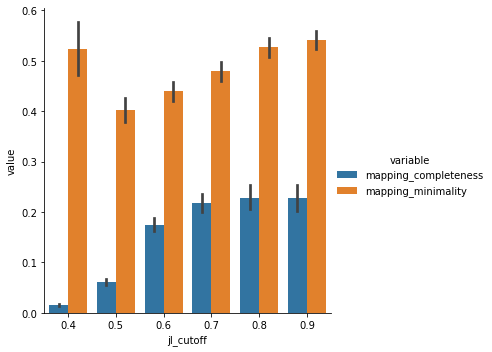

In [94]:
sns.catplot(x="jl_cutoff", y="value",
            hue="variable",
            data=jl_colnames_only_mapping_melt, kind="bar");

# Welche Fitness funktion bei dynamap

In [82]:
with open("intermediate_monitor_2_sampled_original_fitness_fct_files_output.pkl", 'rb') as fr:
    infos = pickle.load(fr)
original = pd.DataFrame(infos)

with open("intermediate_monitor_2_sampled_new_fitness_fct_files_output.pkl", 'rb') as fr:
    infos = pickle.load(fr)
new = pd.DataFrame(infos)

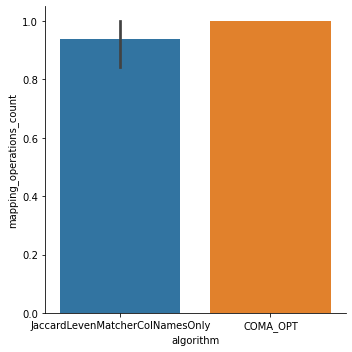

In [89]:
sns.catplot(x="algorithm", y="mapping_operations_count",
            data=new, kind="bar");

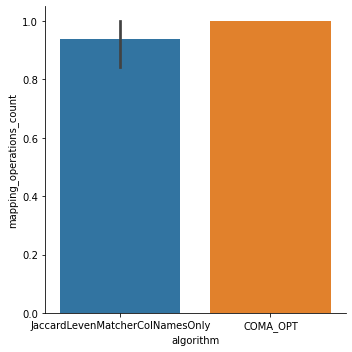

In [90]:
sns.catplot(x="algorithm", y="mapping_operations_count",
            data=original, kind="bar");

In [ ]:
# add as info in alaska_test the name of fitness fct original/new
# facetgrid: row: fitnessfct

# Rechter Arm bei Dynamap merges: Left join oder nur union

In [ ]:
# analog zu oben: facetgrid: row: join oder so